## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Network Traffic
**Steps**:
1. Extract Features from Dataset:
    - Load `network_traffic.csv` .
2. Isolation Forest Model
3. Display Anomalies

Anomaly Count:
 anomaly
normal     255
anomaly     45
Name: count, dtype: int64


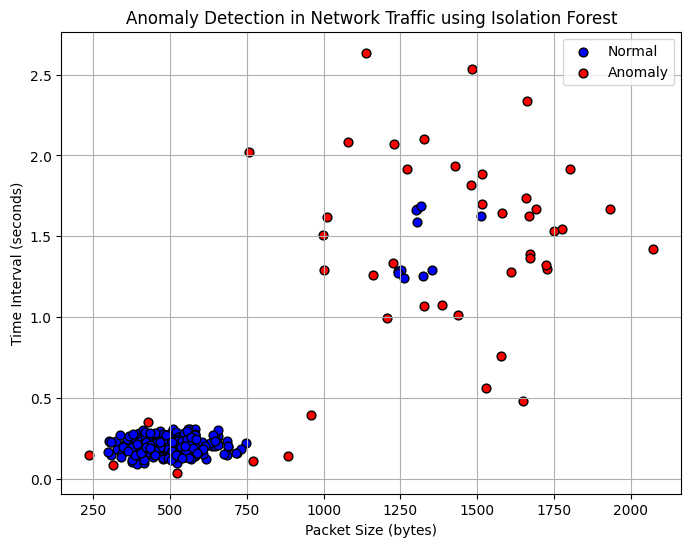

In [2]:
# write your code from here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate Network Traffic Data (Features: Packet Size and Time Interval)
# Simulating 300 network traffic instances with 'Packet_Size' and 'Time_Interval' features
np.random.seed(42)

# Normal traffic (majority of data)
packet_size_normal = np.random.normal(loc=500, scale=100, size=250)  # packet size around 500 bytes
time_interval_normal = np.random.normal(loc=0.2, scale=0.05, size=250)  # time interval between packets (seconds)

# Anomalous traffic (few outliers)
packet_size_anomalous = np.random.normal(loc=1500, scale=300, size=50)  # very large packet size (outliers)
time_interval_anomalous = np.random.normal(loc=1.5, scale=0.5, size=50)  # long time interval (outliers)

# Combine normal and anomalous traffic
packet_size = np.concatenate([packet_size_normal, packet_size_anomalous])
time_interval = np.concatenate([time_interval_normal, time_interval_anomalous])

# Create DataFrame
df = pd.DataFrame({
    'Packet_Size': packet_size,
    'Time_Interval': time_interval
})

# Step 2: Apply Isolation Forest for Anomaly Detection
model = IsolationForest(contamination=0.15, random_state=42)  # Assuming 15% anomalies
model.fit(df)

# Predict anomalies: -1 = anomaly, 1 = normal
predictions = model.predict(df)
df['anomaly'] = np.where(predictions == -1, 'anomaly', 'normal')

# Step 3: Display Anomalies
print("Anomaly Count:\n", df['anomaly'].value_counts())

# Step 4: Plot the Results
plt.figure(figsize=(8, 6))

# Normal points (blue)
plt.scatter(df[df['anomaly'] == 'normal']['Packet_Size'],
            df[df['anomaly'] == 'normal']['Time_Interval'],
            c='blue', label='Normal', edgecolor='k', s=40)

# Anomalies (red)
plt.scatter(df[df['anomaly'] == 'anomaly']['Packet_Size'],
            df[df['anomaly'] == 'anomaly']['Time_Interval'],
            c='red', label='Anomaly', edgecolor='k', s=40)

plt.title("Anomaly Detection in Network Traffic using Isolation Forest")
plt.xlabel("Packet Size (bytes)")
plt.ylabel("Time Interval (seconds)")
plt.legend()
plt.grid(True)
plt.show()